In [10]:
import numpy as np
import matplotlib.pyplot as plt


In [11]:
input_size = 5   
hidden_size = 5
output_size = 1  
num_layers = 4  
learning_rate = 0.1
num_iterations = 500

In [12]:
weights = {
    'W1': np.random.randn(hidden_size, input_size) * 0.01,
    'W2': np.random.randn(hidden_size, hidden_size) * 0.01,
    'W3': np.random.randn(hidden_size, hidden_size) * 0.01,
    'W4': np.random.randn(output_size, hidden_size) * 0.01
}

biases = {
    'b1': np.zeros((hidden_size, 1)),
    'b2': np.zeros((hidden_size, 1)),
    'b3': np.zeros((hidden_size, 1)),
    'b4': np.zeros((output_size, 1))
}


In [13]:
weights['W1'].shape

(5, 5)

In [14]:
def sigmoid(Z):
    return 1 / (1 + np.exp(-Z))
def sigmoid_derivative(A):
    return A * (1 - A)

In [15]:
X = np.random.randn(input_size, 100)  
Y = (np.random.rand(1, 100)>0.5).astype(int)

In [16]:
X.shape

(5, 100)

In [17]:
costs=[]
for i in range(num_iterations):
    
    Z1 = np.dot(weights['W1'], X) + biases['b1']
    A1 = sigmoid(Z1)
    
    Z2 = np.dot(weights['W2'], A1) + biases['b2']
    A2 = sigmoid(Z2)
    
    Z3 = np.dot(weights['W3'], A2) + biases['b3']
    A3 = sigmoid(Z3)
    
    Z4 = np.dot(weights['W4'], A3) + biases['b4']
    A4 = sigmoid(Z4)   

    m = Y.shape[1]
    cost = -np.sum(Y * np.log(A4) + (1 - Y) * np.log(1 - A4)) / m
    costs.append(cost)

    dZ4 = (A4 - Y) * sigmoid_derivative(A4)  
    weights['W4'] -= learning_rate * np.dot(dZ4, A3.T)
    biases['b4'] -= learning_rate * np.sum(dZ4, axis=1, keepdims=True)

    dA3 = np.dot(weights['W4'].T, dZ4)
    dZ3 = dA3 * sigmoid_derivative(A3)
    weights['W3'] -= learning_rate * np.dot(dZ3, A2.T)
    biases['b3'] -= learning_rate * np.sum(dZ3, axis=1, keepdims=True)

    dA2 = np.dot(weights['W3'].T, dZ3)
    dZ2 = dA2 * sigmoid_derivative(A2)
    weights['W2'] -= learning_rate * np.dot(dZ2, A1.T)
    biases['b2'] -= learning_rate * np.sum(dZ2, axis=1, keepdims=True)

    dA1 = np.dot(weights['W2'].T, dZ2)
    dZ1 = dA1 * sigmoid_derivative(A1)
    weights['W1'] -= learning_rate * np.dot(dZ1, X.T)
    biases['b1'] -= learning_rate * np.sum(dZ1, axis=1, keepdims=True)

  

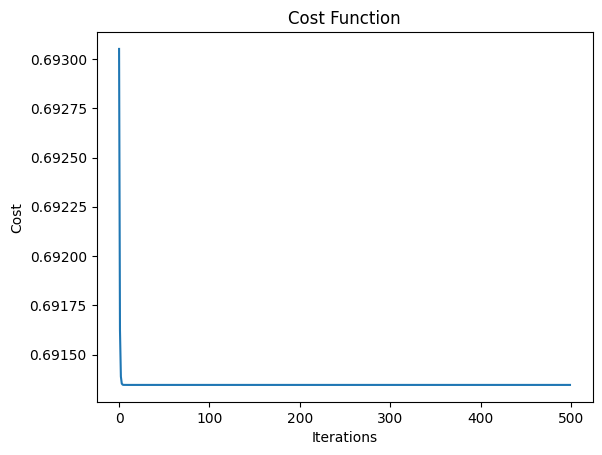

In [18]:
plt.plot(costs)
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.title("Cost Function")
plt.show()
